<a href="https://colab.research.google.com/github/vadhri/ai-notebook/blob/main/timeseries/timeseries_decompose.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook demonstrates time series decomposition techniques. It covers creating synthetic time series data and applying decomposition methods to understand their components.

- Generating Synthetic Time Series: Creating time series data using mathematical functions like sine, cosine, and tangent, and combining them.
- Seasonal Decomposition: Applying seasonal decomposition with a specified period to a combined time series.
- Multiple Seasonal Decomposition (MSTL): Using the MSTL method to decompose a time series with multiple seasonal patterns.
- Trend Removal: Demonstrating how to remove the trend component from a time series after decomposition.

#### Decompose with 2 seasons or trends

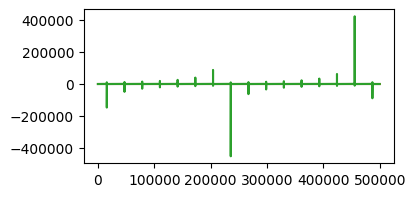

In [12]:
import pandas as pd
import numpy as np

def func_time_series(end, diff_between_points, point_generator_func):
  length = int(end / diff_between_points)
  time_series = np.linspace(0, end, num=length)
  time_series = pd.Series(point_generator_func(time_series))
  return time_series

sin = func_time_series(50, 0.0001, np.sin).plot(figsize=(4,2))
cos = func_time_series(50, 0.0001, np.cos).plot(figsize=(4,2))
tan = func_time_series(50, 0.0001, np.tan).plot(figsize=(4,2))

<Axes: >

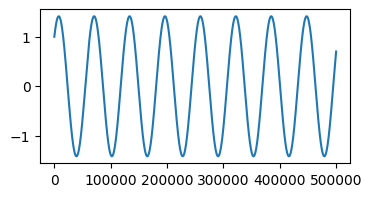

In [13]:
series = pd.DataFrame({'sin': func_time_series(50, 0.0001, np.sin),
                       'cos': func_time_series(50, 0.0001, np.cos),
                       'tan': func_time_series(50, 0.0001, np.tan)})

series['mixed'] = series['sin'] + series['cos']

series['mixed'].plot(figsize=(4,2))

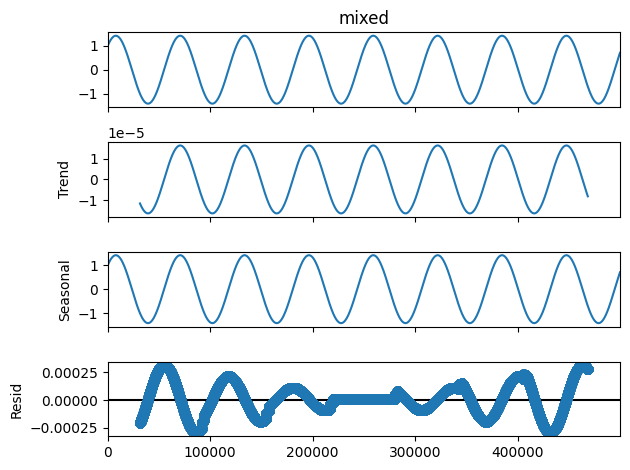

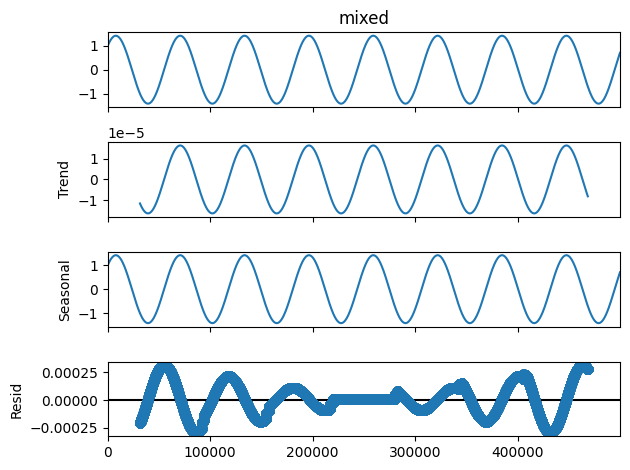

In [14]:
from statsmodels.tsa.seasonal import seasonal_decompose
period = int((2 * np.pi) / 0.0001)
result = seasonal_decompose(series['mixed'], period=period, model='additive')
result.plot()


#### Decompose with multiple seasons

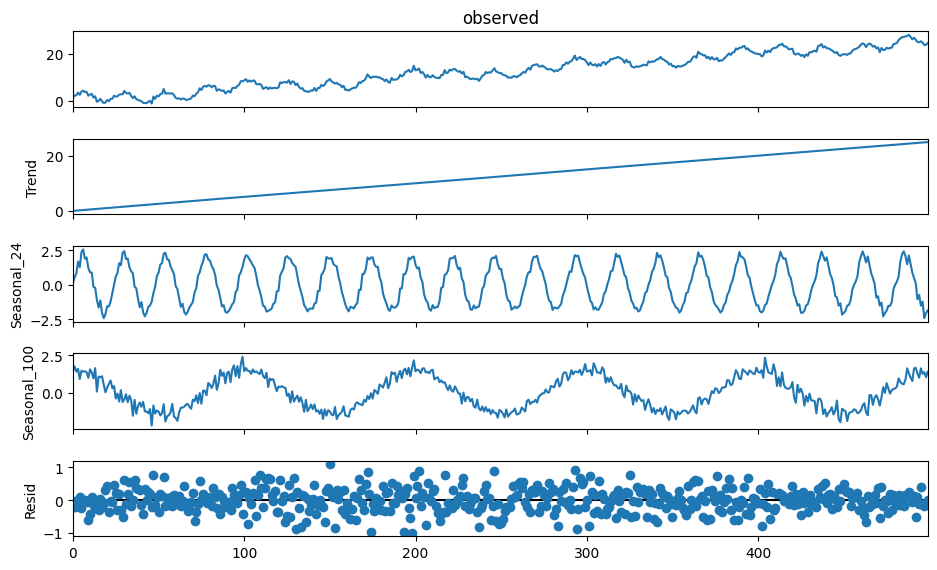

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import MSTL

n = 500
t = np.arange(n)

# Trend: linear increase
trend = 0.05 * t

# Seasonality 1: short cycle (period=24)
season1 = 2 * np.sin(2 * np.pi * t / 24)

# Seasonality 2: longer cycle (period=100)
season2 = 1.5 * np.cos(2 * np.pi * t / 100)

# Noise
noise = 0.5 * np.random.randn(n)

y = trend + season1 + season2 + noise
series = pd.Series(y, index=pd.RangeIndex(n))

# ---- MSTL decomposition ----
mstl = MSTL(series, periods=[24, 100])
res = mstl.fit()

# ---- Plot result ----
fig = res.plot()
fig.set_size_inches(10, 6)
plt.show()


#### Different variance in the data

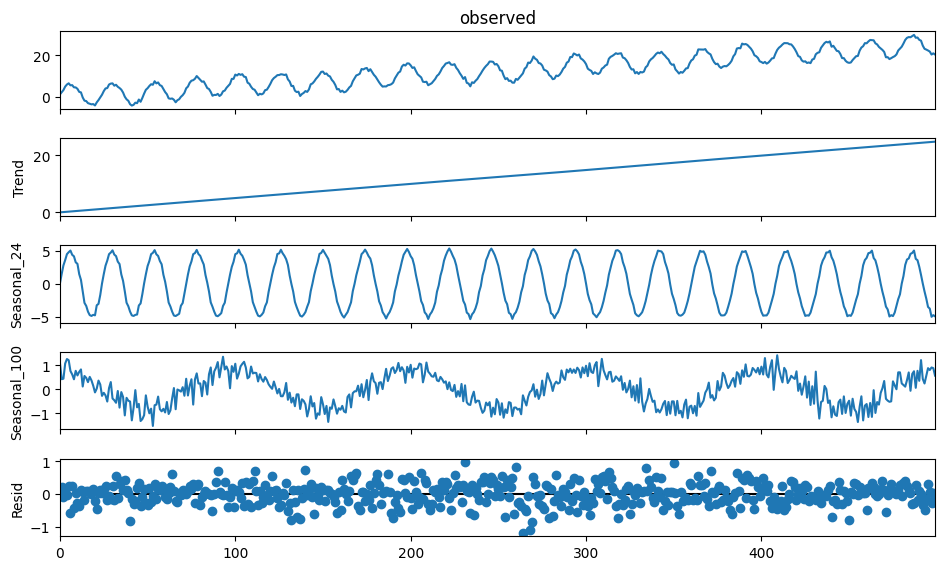

In [17]:
n = 500
t = np.arange(n)

trend = 0.05 * t
season1 = 5 * np.sin(2 * np.pi * t / 24)     # larger variance
season2 = 0.8 * np.cos(2 * np.pi * t / 100)  # smaller variance
noise = 0.5 * np.random.randn(n)

y = trend + season1 + season2 + noise
series = pd.Series(y, index=pd.RangeIndex(n))

mstl = MSTL(series, periods=[24, 100])
res = mstl.fit()

fig = res.plot()
fig.set_size_inches(10, 6)
plt.show()


#### Removing trend from the series.

<Axes: >

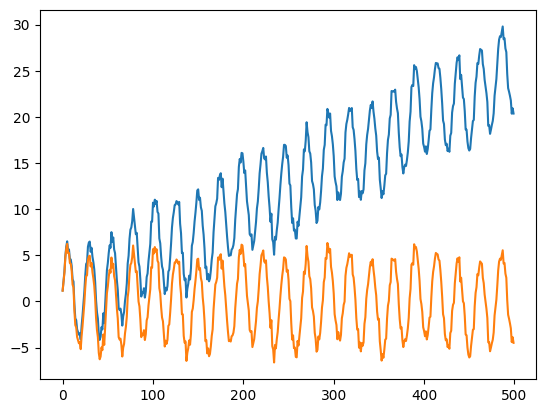

In [20]:
series.plot()
(series-res.trend).plot()